In [3]:
import pandas as pd
import pathlib
import os
from matplotlib import pyplot as plt
import zipfile
import random
import PIL
import torch
import shutil

In [3]:
covid_path = pathlib.Path('../datasets/COVID-CT/')
covid_meta = pd.read_excel(covid_path / 'COVID-CT-MetaInfo.xlsx')
noncovid_meta = pd.read_csv(covid_path / 'NonCOVID-CT-MetaInfo.csv', index_col=0)

In [4]:
covid_meta.head()

,File name,Patient ID,Age,Gender,Location,Medical history,Time,Severity,Other diseases,DOI,Captions
0,2020.01.24.919183-p27-132.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,"Chest tightness, unproductive cough, pain and ...",NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....
1,2020.01.24.919183-p27-133.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,same as above,NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....
2,2020.01.24.919183-p27-134.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,same as above,NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....
3,2020.01.24.919183-p27-135.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,same as above,NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....
4,2020.02.10.20021584-p6-52%0.png,Patient 2,50,M,"Beijing, China",NaN,"Illness Day 8, Hospital Day 0",Early stage: Ground glass shadow in multiple l...,NaN,NaN,['Figure 1. A 50-year-old man with 2019 novel ...


In [5]:
noncovid_meta.head()

,image name,patient id
0,0.jpg,crawled_patient_0
1,1%0.jpg,crawled_patient_1
2,1%1.jpg,crawled_patient_1
3,1%2.jpg,crawled_patient_1
4,10%0.jpg,crawled_patient_10


In [6]:
# with zipfile.ZipFile(covid_path / 'Images-processed/CT_COVID.zip') as archive:
#     archive.extractall(covid_path / 'Images-processed/CT_COVID')

In [7]:
covid_meta.shape

(350, 11)

In [8]:
cancer_path = pathlib.Path('../datasets/The IQ-OTHNCCD lung cancer dataset/')

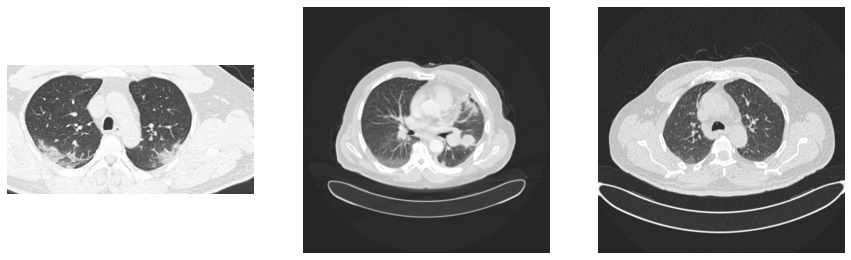

In [9]:
covid_example = PIL.Image.open(
    covid_path / 'Images-processed/CT_COVID' / random.choice(os.listdir(covid_path / 'Images-processed/CT_COVID'))
)
cancer_example = PIL.Image.open(
    cancer_path / 'Malignant cases' / random.choice(os.listdir(cancer_path / 'Malignant cases'))
)
normal_example = PIL.Image.open(
    cancer_path / 'Normal cases' / random.choice(os.listdir(cancer_path / 'Normal cases'))
)

plt.figure(figsize=(15, 12))
plt.subplot(1, 3, 1)
plt.imshow(covid_example, cmap='gray')
plt.axis(False)

plt.subplot(1, 3, 2)
plt.imshow(cancer_example, cmap='gray')
plt.axis(False)

plt.subplot(1, 3, 3)
plt.imshow(normal_example, cmap='gray')
plt.axis(False);


In [10]:
print(f"Number of COVID {len(os.listdir(covid_path / 'Images-processed/CT_COVID'))}")
print(f"Number of cancer {len(os.listdir(cancer_path / 'Malignant cases'))}")
print(f"Number of normal {len(os.listdir(cancer_path / 'Normal cases'))}")

Number of COVID 338
Number of cancer 561
Number of normal 416


In [11]:
tens1 = torch.arange(1, 7).view(2, 3)
tens2 = torch.arange(11, 17).view(2, 3)
tens_c = torch.stack((tens1, tens2), dim=1)
tens_c

tensor([[[ 1,  2,  3],
         [11, 12, 13]],

        [[ 4,  5,  6],
         [14, 15, 16]]])

In [2]:
covid_images_path = pathlib.Path('../datasets/COVID-CT/Images-processed/CT_COVID/')
cancer_images_path = pathlib.Path('../datasets/The IQ-OTHNCCD lung cancer dataset/Malignant cases/')
normal_images_path = pathlib.Path('../datasets/The IQ-OTHNCCD lung cancer dataset/Normal cases/')

print(len(os.listdir(covid_images_path)))
print(len(os.listdir(cancer_images_path)))
print(len(os.listdir(normal_images_path)))

321
561
416


In [4]:
test_size = int(0.1 * len(os.listdir(covid_images_path)))
for i, filename in enumerate(os.listdir(covid_images_path)):
    if i < test_size:
        shutil.copy(covid_images_path / filename, './stargan-v2-experiments/dataset/val/covid/')
    else:
        shutil.copy(covid_images_path / filename, './stargan-v2-experiments/dataset/train/covid/')

In [5]:
test_size = int(0.1 * len(os.listdir(cancer_images_path)))
for i, filename in enumerate(os.listdir(cancer_images_path)):
    if i < test_size:
        shutil.copy(cancer_images_path / filename, './stargan-v2-experiments/dataset/val/cancer/')
    else:
        shutil.copy(cancer_images_path / filename, './stargan-v2-experiments/dataset/train/cancer/')

In [6]:
test_size = int(0.1 * len(os.listdir(normal_images_path)))
for i, filename in enumerate(os.listdir(normal_images_path)):
    if i < test_size:
        shutil.copy(normal_images_path / filename, './stargan-v2-experiments/dataset/val/normal/')
    else:
        shutil.copy(normal_images_path / filename, './stargan-v2-experiments/dataset/train/normal/')

In [1]:
!nvidia-smi

Sun Oct 30 20:49:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:8B:00.0 Off |                    0 |
| N/A   49C    P0   151W / 250W |  26169MiB / 32768MiB |     99%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------